In [2]:
from travel_intelligence.TIAPICommunicator import TIAPICommunicator

In [3]:
comm = TIAPICommunicator("https://api.travel-intelligence.com/")

In [4]:
import jupyterviz

In [7]:
jupyterviz.secretInput("password")

In [8]:
comm.start_Session("sebastien.perez@amadeus.com",password)

https://api.travel-intelligence.com/api/v1/session
TobJT5DKPuPHhZMPYey9


In [9]:
params = dict(market="FR",onds="*-*")
evolution = comm.accessService("ti-search/api/v2/ss_time_evolutions",None,params)

https://api.travel-intelligence.com/ti-search/api/v2/ss_time_evolutions?onds=%2A-%2A&market=FR


In [10]:
jupyterviz.viz(type="json",data=evolution)

In [11]:
x = [e[0] for e in evolution["ss_time_evolutions"][0]["time_evolution"]]

In [12]:
import numpy as np
x = np.array(map(lambda e: np.array(e.split("-")).astype(int),x ))

In [13]:
x[-5:]

array([[2016,   12,   16],
       [2016,   12,   17],
       [2016,   12,   18],
       [2016,   12,   19],
       [2016,   12,   20]])

In [14]:
y = np.array([e[1] for e in evolution["ss_time_evolutions"][0]["time_evolution"]])

In [15]:
y[:5]

array([1913874, 2756039, 3094963, 3119404, 3018401])

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [17]:
x = x[-600:]
y = y[-600:]
x_i = x[:-20]
y_i = y[:-20]

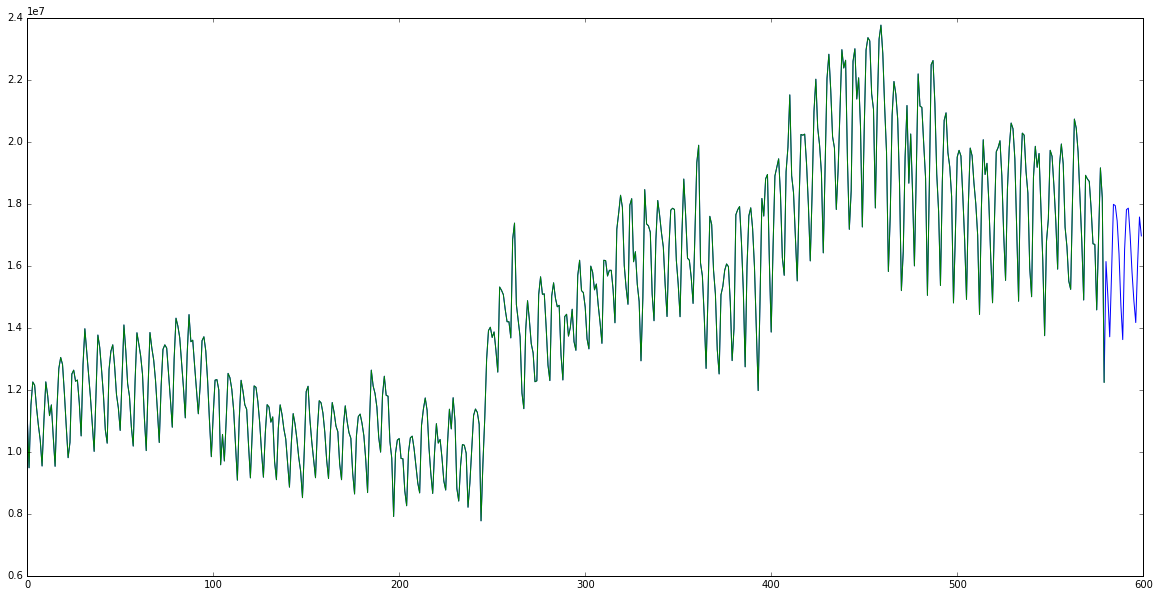

In [18]:
plt.figure(figsize=(20,10))
plt.plot(y)
plt.plot(y_i)
plt.show()

In [19]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_i, y_i,train_size=0.75, test_size=.25)

In [21]:
tpot = TPOTRegressor(verbosity=3,generations=2,population_size=5)

In [22]:
tpot.fit(x_train,y_train)

Optimization Progress:  33%|███▎      | 5/15 [00:57<04:23, 26.31s/pipeline]

Timeout during evaluation of pipeline #1. Skipping to the next pipeline.
Generation 1 - Current Pareto front scores:

Optimization Progress:  67%|██████▋   | 10/15 [01:30<00:55, 11.12s/pipeline]


1	3.14027186368e+12	RandomForestRegressor(CombineDFs(input_matrix, input_matrix))

Generation 2 - Current Pareto front scores:


1	3.13992314681e+12	RandomForestRegressor(input_matrix)
2	2.8908872632e+12	RandomForestRegressor(CombineDFs(RBFSampler(input_matrix, 46.0), input_matrix))



In [23]:
tpot.score(x_test,y_test)

1463260096960.8018

In [24]:
submission = tpot.predict(x)

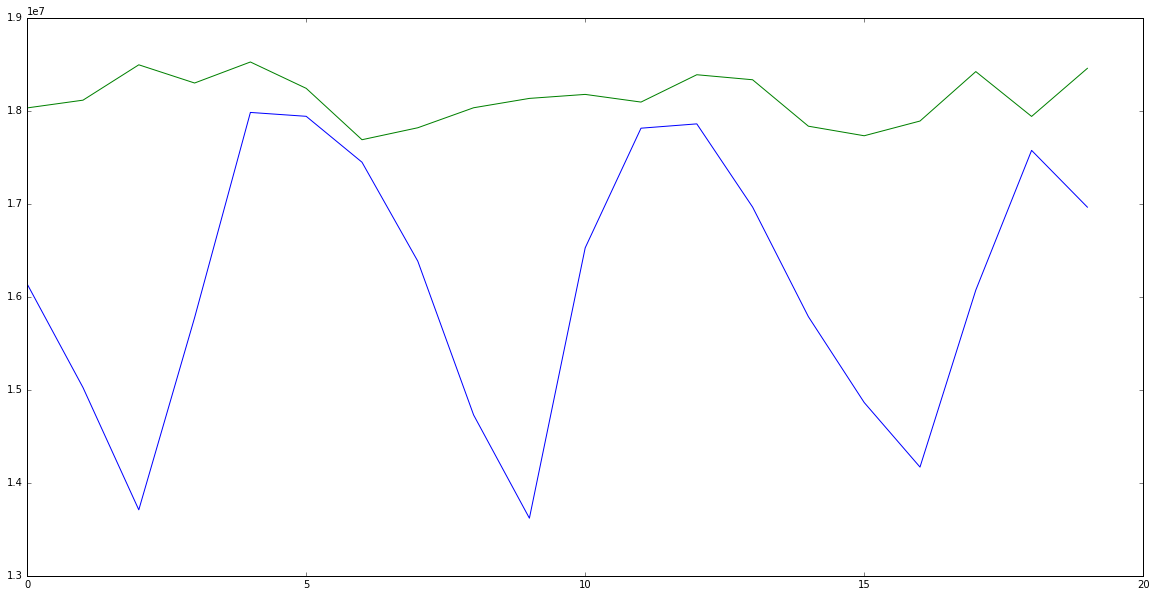

In [25]:
plt.figure(figsize=(20,10))
plt.plot(y[-20:])
plt.plot(submission[-20:])
plt.show()

In [26]:
tpot.export("searchpred.py")

In [27]:
x = [e[0] for e in evolution["ss_time_evolutions"][0]["time_evolution"]]
x = np.array(map(lambda e: np.array(e.split("-")).astype(int),x ))

In [28]:
from datetime import datetime
def getDayWeek(list):
    return np.hstack((list,[datetime(list[0],list[1],list[2]).weekday()]))

In [29]:
getDayWeek(np.array([2011,1,1]))

array([2011,    1,    1,    5])

In [30]:
x = np.array(map(getDayWeek,x))

In [31]:
x[:5]

array([[2011,    1,    1,    5],
       [2011,    1,    2,    6],
       [2011,    1,    3,    0],
       [2011,    1,    4,    1],
       [2011,    1,    5,    2]])

In [37]:
x = x[-700:]
y = y[-700:]
x_i = x[:-20]
y_i = y[:-20]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_i, y_i,train_size=0.75, test_size=.25)
tpot = TPOTRegressor(verbosity=3,generations=2,population_size=5)
tpot.fit(x_train,y_train)

Optimization Progress:  60%|██████    | 9/15 [00:21<00:17,  2.87s/pipeline]

Generation 1 - Current Pareto front scores:
1	9.21569915207e+11	ExtraTreesRegressor(input_matrix, 0.55000000000000004)

Generation 2 - Current Pareto front scores:


1	9.21569915207e+11	ExtraTreesRegressor(input_matrix, 0.55000000000000004)



In [39]:
submission = tpot.predict(x)

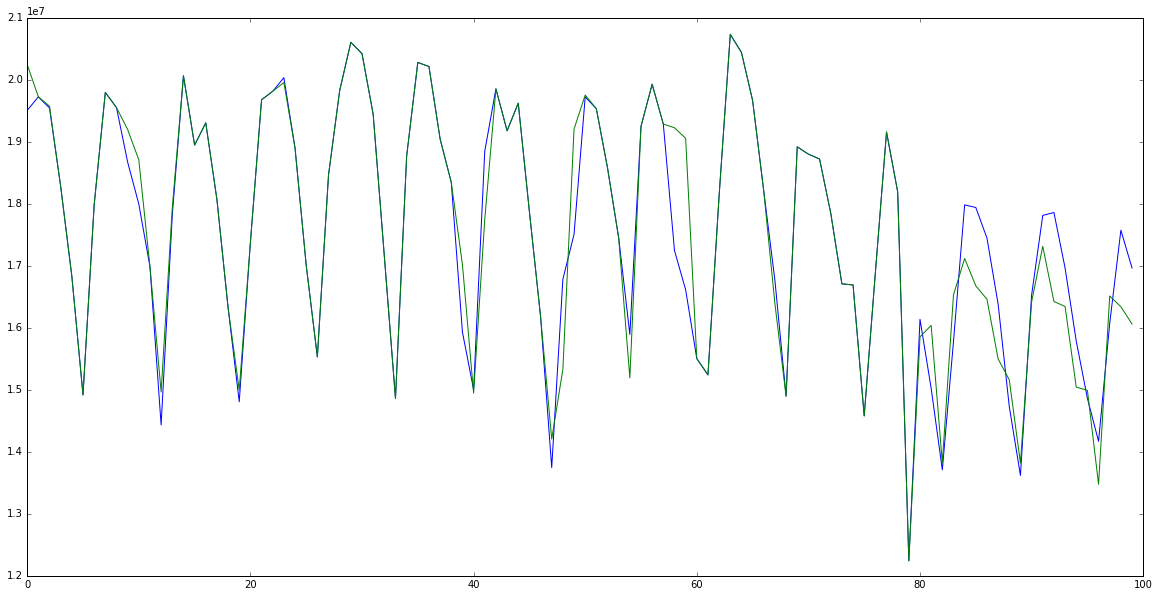

In [40]:
plt.figure(figsize=(20,10))
plt.plot(y[-100:])
plt.plot(submission[-100:])
plt.show()

In [41]:
tpot.export("searchpred.py")

In [43]:
## Comparing with simple sklearn regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_i, y_i)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
submission = reg.predict(x)

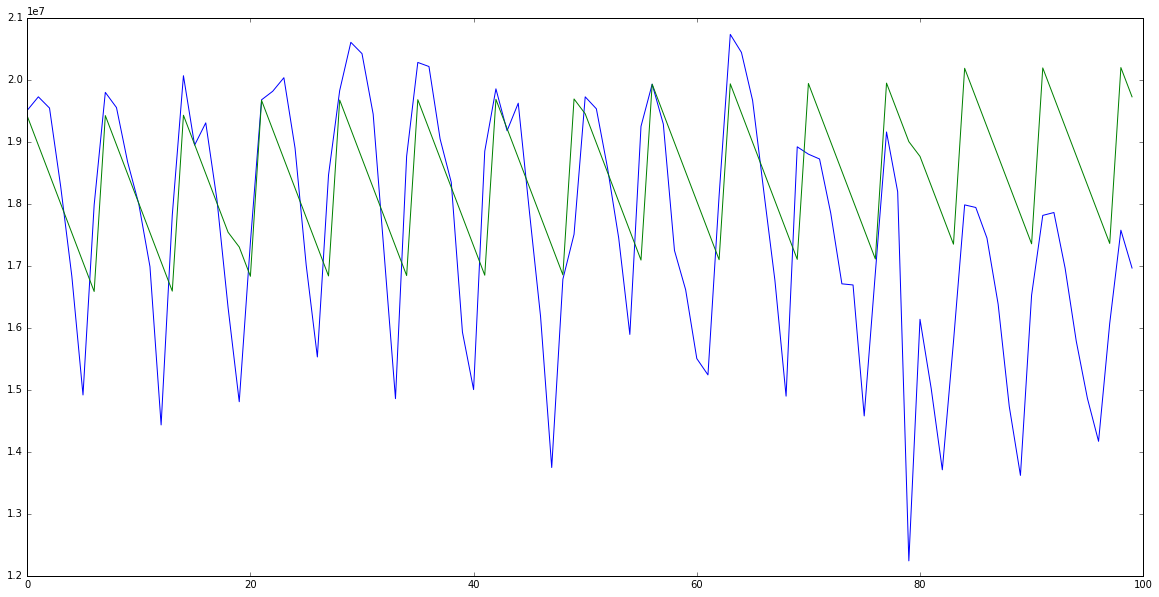

In [46]:
plt.figure(figsize=(20,10))
plt.plot(y[-100:])
plt.plot(submission[-100:])
plt.show()

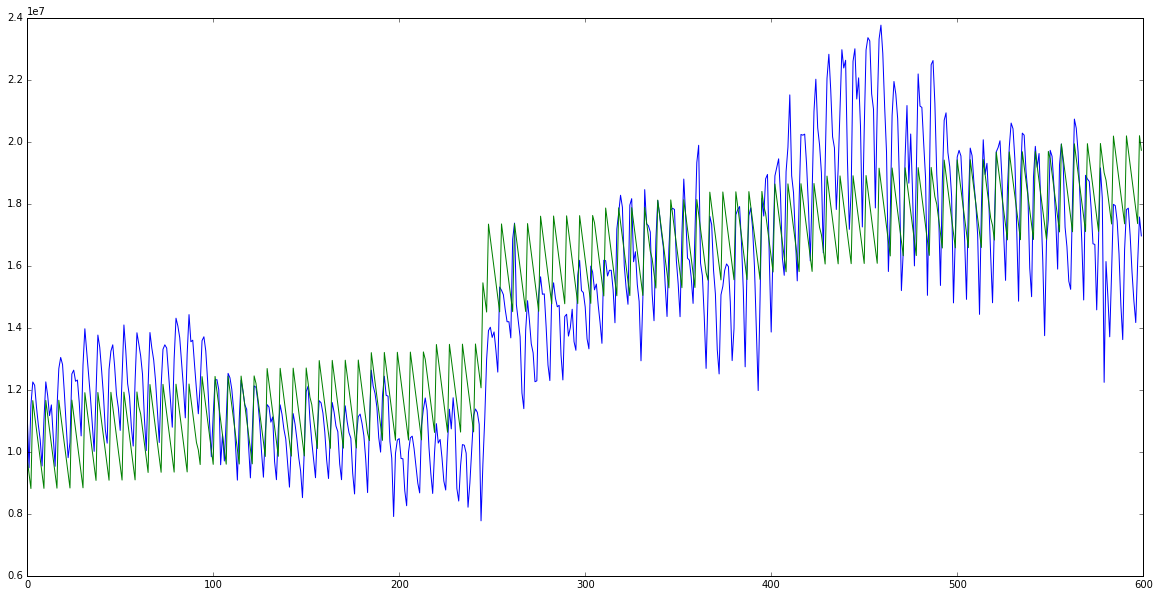

In [47]:
plt.figure(figsize=(20,10))
plt.plot(y)
plt.plot(submission)
plt.show()

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(x_i, y_i)

In [56]:
submission = model.predict(x)

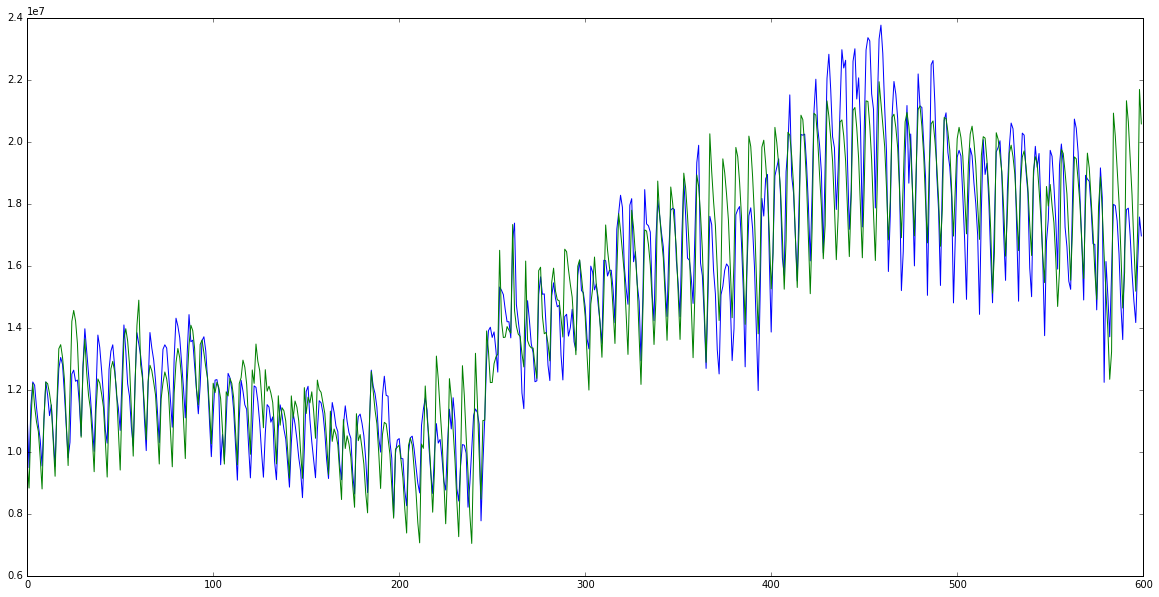

In [57]:
plt.figure(figsize=(20,10))
plt.plot(y)
plt.plot(submission)
plt.show()

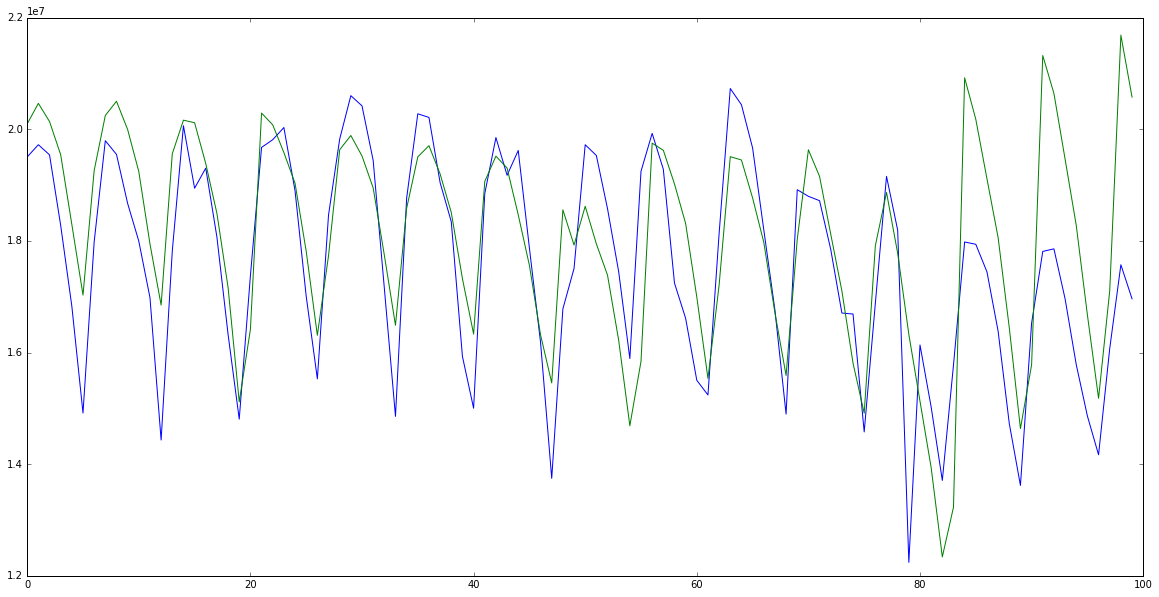

In [58]:
plt.figure(figsize=(20,10))
plt.plot(y[-100:])
plt.plot(submission[-100:])
plt.show()